In [1]:
import numpy as np
import pandas as pd
import glob
import re
import os

In [2]:
# 自定义排序函数，用于提取文件名中的数字并转换为整数
def sort_key(filepath):
    # 只获取文件名，不包含路径
    filename = os.path.basename(filepath)
    # 假设文件名格式为 'prefix_number.csv'
    numbers = re.findall(r'\d+', filename)
    # 返回第一个找到的数字的整数形式，如果没有找到数字，则返回0
    return int(numbers[0]) if numbers else 0

In [3]:
# Reading all files
file_prefix_test = '2021to2023'
height_files_test = sorted(glob.glob(file_prefix_test + '/heightabovegeoid_*.csv'), key=sort_key)
# pressure_files = sorted(glob.glob(file_prefix_test + '/pressureatseafloor_*.csv'))
salinity_files_test = sorted(glob.glob(file_prefix_test + '/salinity_*.csv'), key=sort_key)
temperature_files_test = sorted(glob.glob(file_prefix_test + '/temperature_*.csv'), key=sort_key)
watermass_files_test = sorted(glob.glob(file_prefix_test + '/watermass_*.csv'), key=sort_key)

file_prefix_train = '2001to2020'    
height_files_train = sorted(glob.glob(file_prefix_train + '/height_*.csv'), key=sort_key)
salinity_files_train = sorted(glob.glob(file_prefix_train + '/salinity_*.csv'), key=sort_key)
temperature_files_train = sorted(glob.glob(file_prefix_train + '/temperature_*.csv'), key=sort_key)
watermass_files_train = sorted(glob.glob(file_prefix_train + '/watermass_*.csv'), key=sort_key)

height_data_test = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in height_files_test])
# pressure_data = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in pressure_files_test])
salinity_data_test = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in salinity_files_test])
temperature_data_test = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in temperature_files_test])
watermass_data_test = np.array([pd.read_csv(file, header=None).values for file in watermass_files_test])

height_data_train = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in height_files_train])
salinity_data_train = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in salinity_files_train])
temperature_data_train = np.array([pd.read_csv(file, header=None, encoding="utf-8").values for file in temperature_files_train])
watermass_data_train = np.array([pd.read_csv(file, header=None).values for file in watermass_files_train])

num_samples = len(height_files_train)
months = np.arange(num_samples)[:, np.newaxis,  np.newaxis]  # Add new axes for month
months = np.tile(months+192, (240, 240))  # Repeat the month value to match spatial dimensions

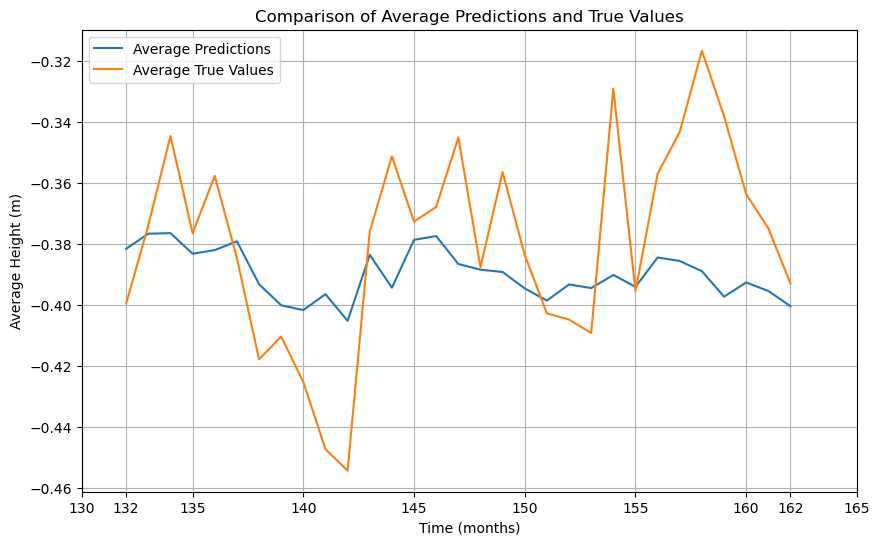

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
avg_predictions = pd.read_csv('predict/average_predictions.csv')
avg_true_values = pd.read_csv('true/average_true_values.csv')

indices= range(132,163)

# 创建一个图形框架
plt.figure(figsize=(10, 6))

# 绘制预测值和真实值
plt.plot(indices, avg_predictions, label='Average Predictions')
plt.plot(indices, avg_true_values, label='Average True Values')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Comparison of Average Predictions and True Values')
plt.xlabel('Time (months)')
plt.ylabel('Average Height (m)')

# 获取当前x轴刻度
current_ticks = list(plt.xticks()[0])

# 确保第一个和最后一个值被包含在x轴刻度中
if indices[0] not in current_ticks:
    current_ticks.append(indices[0])
if indices[-1] not in current_ticks:
    current_ticks.append(indices[-1])

# 重新设置x轴刻度
plt.xticks(sorted(current_ticks))

plt.grid(True)

# 显示图形
plt.show()

In [2]:
i=range(2,6)
for i in range(2,6):
    print(i)

2
3
4
5
